In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [282]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


In [283]:
local_counts = df.geography.value_counts()
local_counts

South Central           556
Columbus                556
Midsouth                556
New Orleans/Mobile      556
Boston                  556
Sacramento              556
Baltimore/Washington    556
Indianapolis            556
Plains                  556
Albany                  556
Richmond/Norfolk        556
Hartford/Springfield    556
West                    556
Syracuse                556
San Francisco           556
Pittsburgh              556
Philadelphia            556
Jacksonville            556
Tampa                   556
San Diego               556
Southeast               556
Boise                   556
Buffalo/Rochester       556
Nashville               556
Northeast               556
Roanoke                 556
Houston                 556
California              556
Portland                556
Phoenix/Tucson          556
Los Angeles             556
Dallas/Ft. Worth        556
Orlando                 556
Atlanta                 556
Chicago                 556
Denver              

In [284]:
#pd.get_dummies(df.geography, prefix='geography')
#df.head()

In [285]:
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
average_price,1.000000,-0.184255,-0.203079,-0.161584,-0.171439,-0.165742,-0.167315,-0.153199,-0.105359,-0.011460
total_volume,-0.184255,1.000000,0.976503,0.953720,0.861139,0.955636,0.972365,0.857310,0.735133,0.033126
4046,-0.203079,0.976503,1.000000,0.917269,0.839122,0.902623,0.927221,0.794043,0.667539,0.007287
4225,-0.161584,0.953720,0.917269,1.000000,0.877696,0.845508,0.884774,0.713055,0.597591,-0.016295
4770,-0.171439,0.861139,0.839122,0.877696,1.000000,0.759560,0.792079,0.640577,0.605428,-0.027676
total_bags,-0.165742,0.955636,0.902623,0.845508,0.759560,1.000000,0.987919,0.951869,0.835809,0.098003
small_bags,-0.167315,0.972365,0.927221,0.884774,0.792079,0.987919,1.000000,0.893344,0.803242,0.079293
large_bags,-0.153199,0.857310,0.794043,0.713055,0.640577,0.951869,0.893344,1.000000,0.816688,0.125919
xlarge_bags,-0.105359,0.735133,0.667539,0.597591,0.605428,0.835809,0.803242,0.816688,1.000000,0.118915
year,-0.011460,0.033126,0.007287,-0.016295,-0.027676,0.098003,0.079293,0.125919,0.118915,1.000000


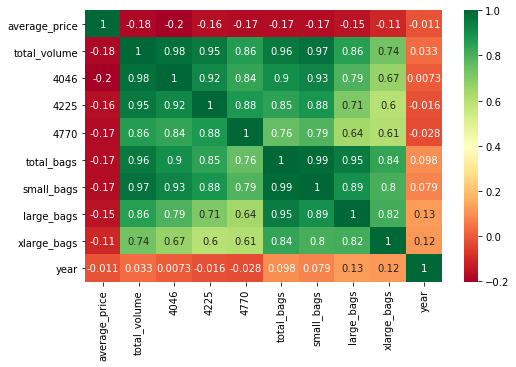

In [286]:
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [287]:
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
df.head(20)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,organic,2015,Boston


In [288]:
ml_df = df[['date', 'average_price', '4046', '4225', '4770', 'total_volume', 'total_bags', 'type', 'geography', ]].copy()
ml_df.head()

,date,average_price,4046,4225,4770,total_volume,total_bags,type,geography
0,1/4/2015,1.22,2819.50,28287.42,49.90,40873.28,9716.46,conventional,Albany
1,1/4/2015,1.79,57.42,153.88,0.00,1373.95,1162.65,organic,Albany
2,1/4/2015,1.00,364302.39,23821.16,82.15,435021.49,46815.79,conventional,Atlanta
3,1/4/2015,1.76,1500.15,938.35,0.00,3846.69,1408.19,organic,Atlanta
4,1/4/2015,1.08,53987.31,552906.04,39995.03,788025.06,141136.68,conventional,Baltimore/Washington


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25017 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           25017 non-null  object 
 1   average_price  25017 non-null  float64
 2   total_volume   25017 non-null  float64
 3   4046           25017 non-null  float64
 4   4225           25017 non-null  float64
 5   4770           25017 non-null  float64
 6   total_bags     25017 non-null  float64
 7   small_bags     25017 non-null  float64
 8   large_bags     25017 non-null  float64
 9   xlarge_bags    25017 non-null  float64
 10  type           25017 non-null  object 
 11  year           25017 non-null  int64  
 12  geography      25017 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.7+ MB


In [290]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,25017.000000,2.501700e+04,2.501700e+04,2.501700e+04,25017.000000,2.501700e+04,2.501700e+04,2.501700e+04,25017.000000,25017.000000
mean,1.396693,3.079929e+05,9.144273e+04,9.637731e+04,7348.791744,1.128017e+05,8.019841e+04,3.069328e+04,1910.012348,2017.205141
std,0.390227,5.671086e+05,2.060140e+05,2.056186e+05,22471.044034,2.305220e+05,1.772875e+05,7.523095e+04,11880.033029,1.570144
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.135780e+04,5.262400e+02,2.105480e+03,0.000000,6.396620e+03,3.940160e+03,1.904400e+02,0.000000,2016.000000
50%,1.350000,8.274914e+04,5.889720e+03,1.554536e+04,121.050000,3.397641e+04,2.318740e+04,3.200300e+03,0.000000,2017.000000
75%,1.630000,3.648624e+05,8.795790e+04,8.670493e+04,3265.560000,1.156470e+05,8.468527e+04,2.347987e+04,290.280000,2019.000000
max,3.250000,6.469664e+06,2.914047e+06,2.938207e+06,388259.150000,3.336124e+06,2.808810e+06,1.155547e+06,479073.530000,2020.000000


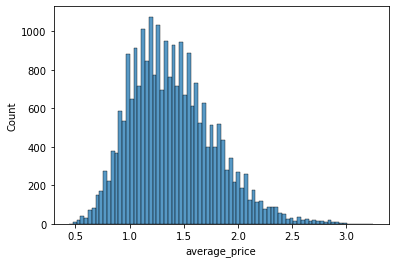

In [291]:
sns.histplot(df['average_price'])

In [292]:
df['geography'].nunique()

45

In [293]:
#Info about 'type'... average price for each type, total volume sold of each type and total sold of each type.
colors=['green','brown']
types=df.groupby(['type'])['average_price'].mean().index
val=df['type'].value_counts().values
from plotly.subplots import make_subplots
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'bar'}]], subplot_titles=['Types Sold', 'Avg Price per Type'])
fig.add_traces([go.Pie(labels=types,values=val,textinfo='value',marker=dict(colors=colors,line=dict(color='#000000', width=2)))],1,1)

fig.add_traces([go.Bar(x=types,y=df.groupby(['type'])['average_price'].mean().values,marker_color=colors,textposition='auto',
                      texttemplate='%{text:.3f}',text=df.groupby(['type'])['average_price'].mean().values)],1,2)

In [294]:
#total volume sold of each type
tot_vol=df.groupby('type')['total_volume'].sum()
tot_bag=df.groupby('type')['total_bags'].sum()
colors=['green','brown']
types=df.groupby(['type'])['average_price'].mean().index
val=df['type'].value_counts().values
from plotly.subplots import make_subplots
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Total Volume Sold', 'Total Bags Sold'])
fig.add_traces([go.Pie(labels=types,values=tot_vol,textinfo='value',marker=dict(colors=colors,line=dict(color='#000000', width=2)))],1,1)

fig.add_traces([go.Pie(labels=types,values=tot_bag,textinfo='value',marker=dict(colors=colors,line=dict(color='#000000', width=2)))],1,2)


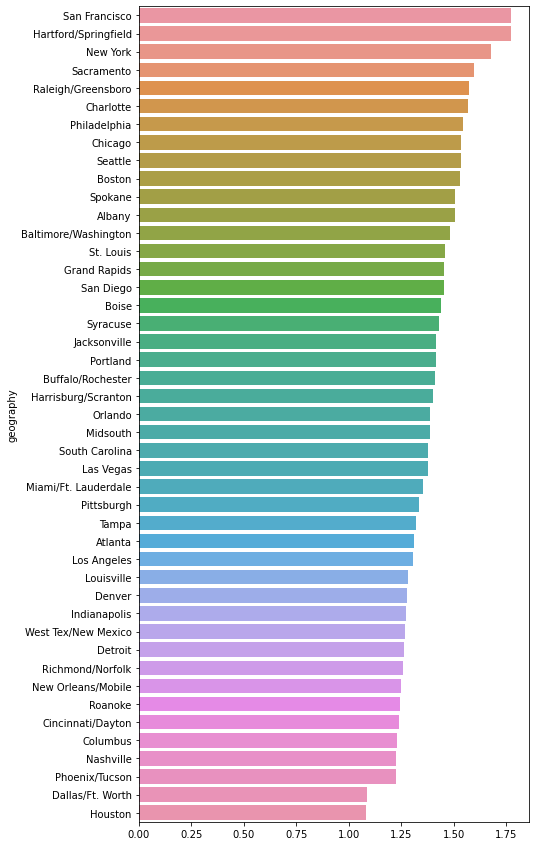

In [295]:
# Info about geography: which geog has the high price, which geog consumed the most avocados, total pies sold for each geog.
avg_pr=df.groupby('geography')['average_price'].mean().sort_values(ascending=False).values
loc=df.groupby('geography')['average_price'].mean().sort_values(ascending=False).index
plt.figure(figsize=(7,15))
sns.barplot(x=avg_pr,y=loc)

Text(0.5, 1.0, 'Avg Pieces Sold per Area')

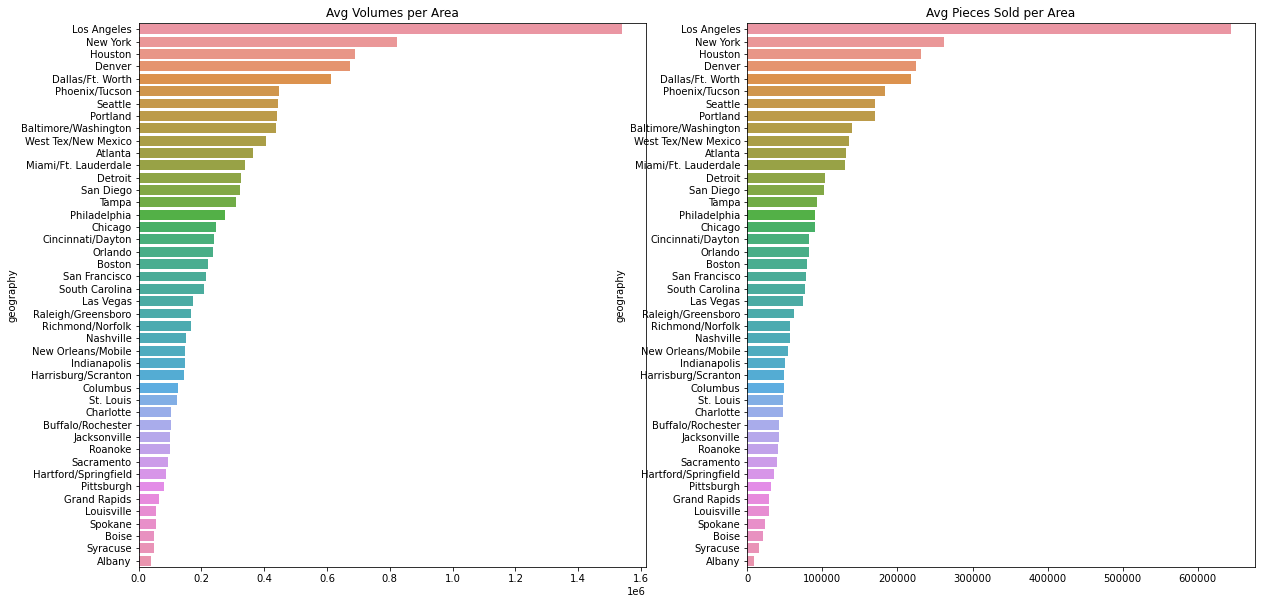

In [296]:
# Which area consumed the most avocaos
avg_vol=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).index[1:]

avg_bag=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).index[1:]

fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=avg_vol,y=loc,ax=ax[0])
ax[0].set_title('Avg Volumes per Area')

sns.barplot(x=avg_bag,y=loc,ax=ax[1])
ax[1].set_title('Avg Pieces Sold per Area')


In [297]:
# Plotting the average price by month
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month

In [298]:
px.box(df,x='month',y='average_price')

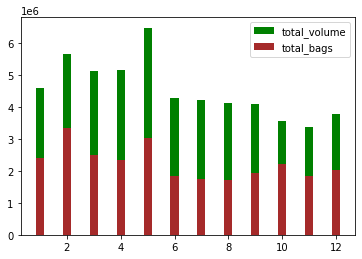

In [299]:
#Plotting the number of bags sold each month in comparison to the total volume of avocados sold each month
plt.bar(x=df['month'],height=df['total_volume'],width=0.3,color='green',label='total_volume')
plt.bar(x=df['month'],height=df['total_bags'],width=0.3,color='brown',label='total_bags')
plt.legend()

Text(0.5, 1.0, 'Organic Average Price by Month')

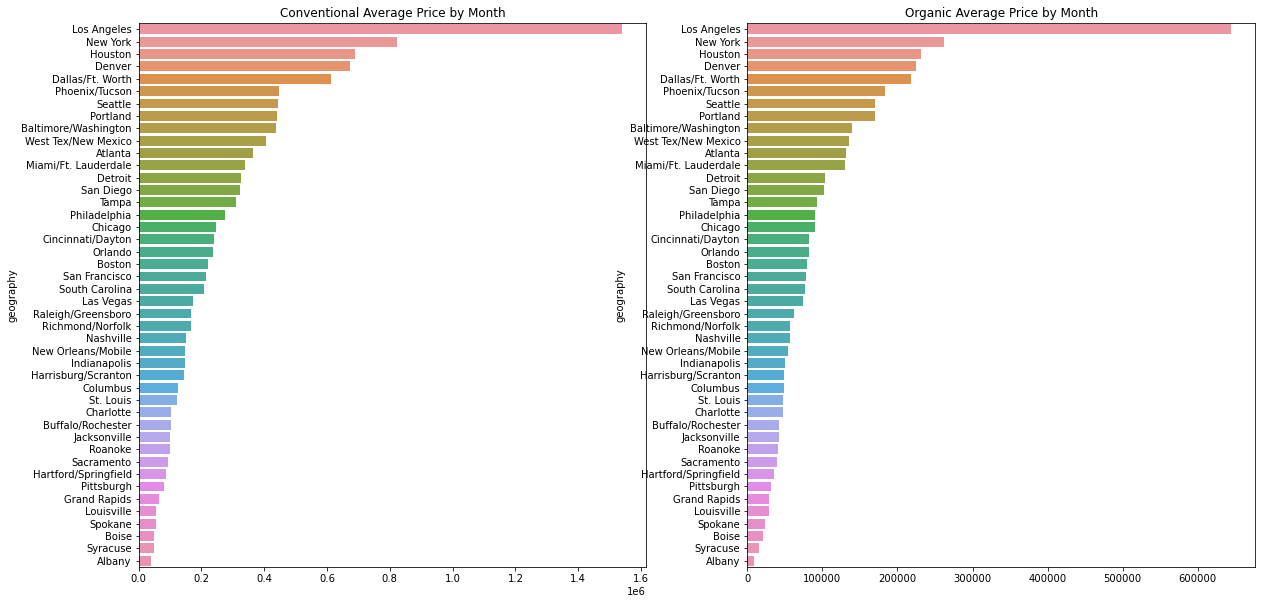

In [300]:
average_price=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_volume'].mean().sort_values(ascending=False).index[1:]
average_price=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).values[1:]
loc=df.groupby('geography')['total_bags'].mean().sort_values(ascending=False).index[1:]


fig,ax=plt.subplots(1,2,figsize=(20,10))
sns.barplot(x=avg_vol,y=loc,ax=ax[0])
ax[0].set_title('Conventional Average Price by Month')

sns.barplot(x=avg_bag,y=loc,ax=ax[1])
ax[1].set_title('Organic Average Price by Month')



C:\Users\Peter\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



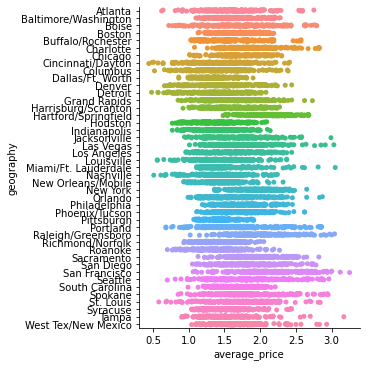

In [301]:
order = (
    df_organic[(df_organic['date']==2017)].groupby('geography')['average_price'].mean().sort_values().index)
sns.catplot('average_price','geography',data=df_organic)

In [302]:
# plot the price variation by which type of avocado was sold in each geography
org_val=df_organic.groupby(['geography'])['average_price'].mean().values
org_ind=df_organic.groupby(['geography'])['average_price'].mean().index
con_val=df_conventional.groupby(['geography'])['average_price'].mean().values
con_ind=df_conventional.groupby(['geography'])['average_price'].mean().index
fig = go.Figure()
fig.add_trace(go.Scatter(x=org_ind, y=org_val,mode='markers+lines',name='Oragnic'))
fig.add_trace(go.Scatter(x=con_ind, y=con_val,mode='markers+lines',name='Conventional'))
fig.update_layout(title='Organic and Conventional Sales by Geography')

In [303]:
#Yearly changes in price between conventional and organic sales
A=df.groupby(['type', 'year', 'geography',])['average_price'].mean().reset_index()
A.head()
fig=px.line(A, x= 'geography', y= 'average_price', animation_frame='year',color='type')
fig.update_layout(title= "average price changes for Avocado types each year")

In [304]:
# What are the average prices each season: spring, summer, fall and winter?
conditions=[(df['month'].between(3,5,inclusive=True)),
           (df['month'].between(6,8,inclusive=True)),
           (df['month'].between(9,11,inclusive=True)),
           (df['month'].between(12,2,inclusive=True))]
values=['Spring','Summer','Fall','Winter']
df['seasons'] = np.select(conditions, values)

In [305]:
df['seasons'].replace('0','Winter',inplace=True)

In [306]:
df.seasons.value_counts()

Spring    7020
Winter    6299
Fall      5850
Summer    5848
Name: seasons, dtype: int64

In [307]:
B=df.groupby(['year','type','month','geography','seasons'])['average_price'].mean().reset_index()
B.head()

,year,type,month,geography,seasons,average_price
0,2015,conventional,1,Albany,Winter,1.1725
1,2015,conventional,1,Atlanta,Winter,1.0800
2,2015,conventional,1,Baltimore/Washington,Winter,1.1700
3,2015,conventional,1,Boise,Winter,1.0750
4,2015,conventional,1,Boston,Winter,1.1300


C:\Users\Peter\anaconda3\envs\PythonData\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



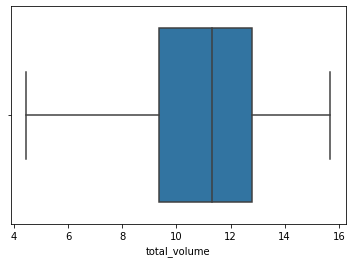

In [308]:
# Check total volume distribution
sns.boxplot(np.log(ml_df['total_volume']))

In [309]:
# CHeck for skew
print(np.log(ml_df['total_volume']).skew())
print(ml_df['total_bags'].skew())

-0.0862979362359602
4.904226005027797


In [310]:
ml_df['total_volume']=np.log1p(ml_df['total_volume'])
ml_df['total_bags']=np.log1p(ml_df['total_bags'])

In [311]:
ml_df.head()

,date,average_price,4046,4225,4770,total_volume,total_bags,type,geography
0,1/4/2015,1.22,2819.50,28287.42,49.90,10.618256,9.181680,conventional,Albany
1,1/4/2015,1.79,57.42,153.88,0.00,7.226173,7.059317,organic,Albany
2,1/4/2015,1.00,364302.39,23821.16,82.15,12.983153,10.753997,conventional,Atlanta
3,1/4/2015,1.76,1500.15,938.35,0.00,8.255228,7.250770,organic,Atlanta
4,1/4/2015,1.08,53987.31,552906.04,39995.03,13.577286,11.857491,conventional,Baltimore/Washington


In [312]:
#Catagorical data that will need to be changed to numbers
print(ml_df['type'].nunique())
print(ml_df['geography'].nunique())

2
45


In [313]:
# Use get_dummies() to create variables for text features.
kind = pd.get_dummies(ml_df['type'])
geog = pd.get_dummies(ml_df['geography'])
combined = pd.concat([kind,geog], axis= 1)
df1 = ml_df.merge(combined,left_index = True,right_index = True)
ml_df = df.drop(['type','geography'], axis =1)
df1

,date,average_price,4046,4225,4770,total_volume,total_bags,type,geography,conventional,...,Sacramento,San Diego,San Francisco,Seattle,South Carolina,Spokane,St. Louis,Syracuse,Tampa,West Tex/New Mexico
0,1/4/2015,1.22,2819.50,28287.42,49.90,10.618256,9.181680,conventional,Albany,1,...,0,0,0,0,0,0,0,0,0,0
1,1/4/2015,1.79,57.42,153.88,0.00,7.226173,7.059317,organic,Albany,0,...,0,0,0,0,0,0,0,0,0,0
2,1/4/2015,1.00,364302.39,23821.16,82.15,12.983153,10.753997,conventional,Atlanta,1,...,0,0,0,0,0,0,0,0,0,0
3,1/4/2015,1.76,1500.15,938.35,0.00,8.255228,7.250770,organic,Atlanta,0,...,0,0,0,0,0,0,0,0,0,0
4,1/4/2015,1.08,53987.31,552906.04,39995.03,13.577286,11.857491,conventional,Baltimore/Washington,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30012,5/17/2020,1.63,249.00,143.00,0.00,7.494986,7.249926,organic,Syracuse,0,...,0,0,0,0,0,0,0,1,0,0
30013,5/17/2020,1.12,238039.66,16379.48,151.06,13.290285,12.727384,conventional,Tampa,1,...,0,0,0,0,0,0,0,0,1,0
30014,5/17/2020,1.19,200.00,0.00,0.00,9.556409,9.542087,organic,Tampa,0,...,0,0,0,0,0,0,0,0,1,0
30019,5/17/2020,0.89,430203.10,126497.28,21104.42,14.031194,13.404387,conventional,West Tex/New Mexico,1,...,0,0,0,0,0,0,0,0,0,1
